##### Importando Bibliotecas

In [62]:
import yfinance as yf
import pandas as pd
import numpy as np
import datetime as dt
from numpy import linalg as la
import matplotlib.pyplot as plt
from scipy.sparse import diags

##### Fazendo o Download do Ticker da Bovespa

In [63]:
ticker = '^BVSP'

In [64]:
dados = yf.download(ticker, start=dt.datetime.now()-dt.timedelta(days=365), end=dt.datetime.now())['Adj Close']
df = pd.DataFrame(dados)

[*********************100%***********************]  1 of 1 completed


In [65]:
df

,Adj Close
Date,
2022-08-05,106472.0
2022-08-08,108402.0
2022-08-09,108651.0
2022-08-10,110236.0
2022-08-11,109718.0
...,...
2023-07-31,121943.0
2023-08-01,121248.0
2023-08-02,120859.0


##### Setando Dados

In [66]:
df.reset_index(inplace=True)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       250 non-null    datetime64[ns]
 1   Adj Close  250 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.0 KB


In [68]:
df.set_index('Date', inplace=True)
df= df.asfreq('B')

<Axes: xlabel='Date'>

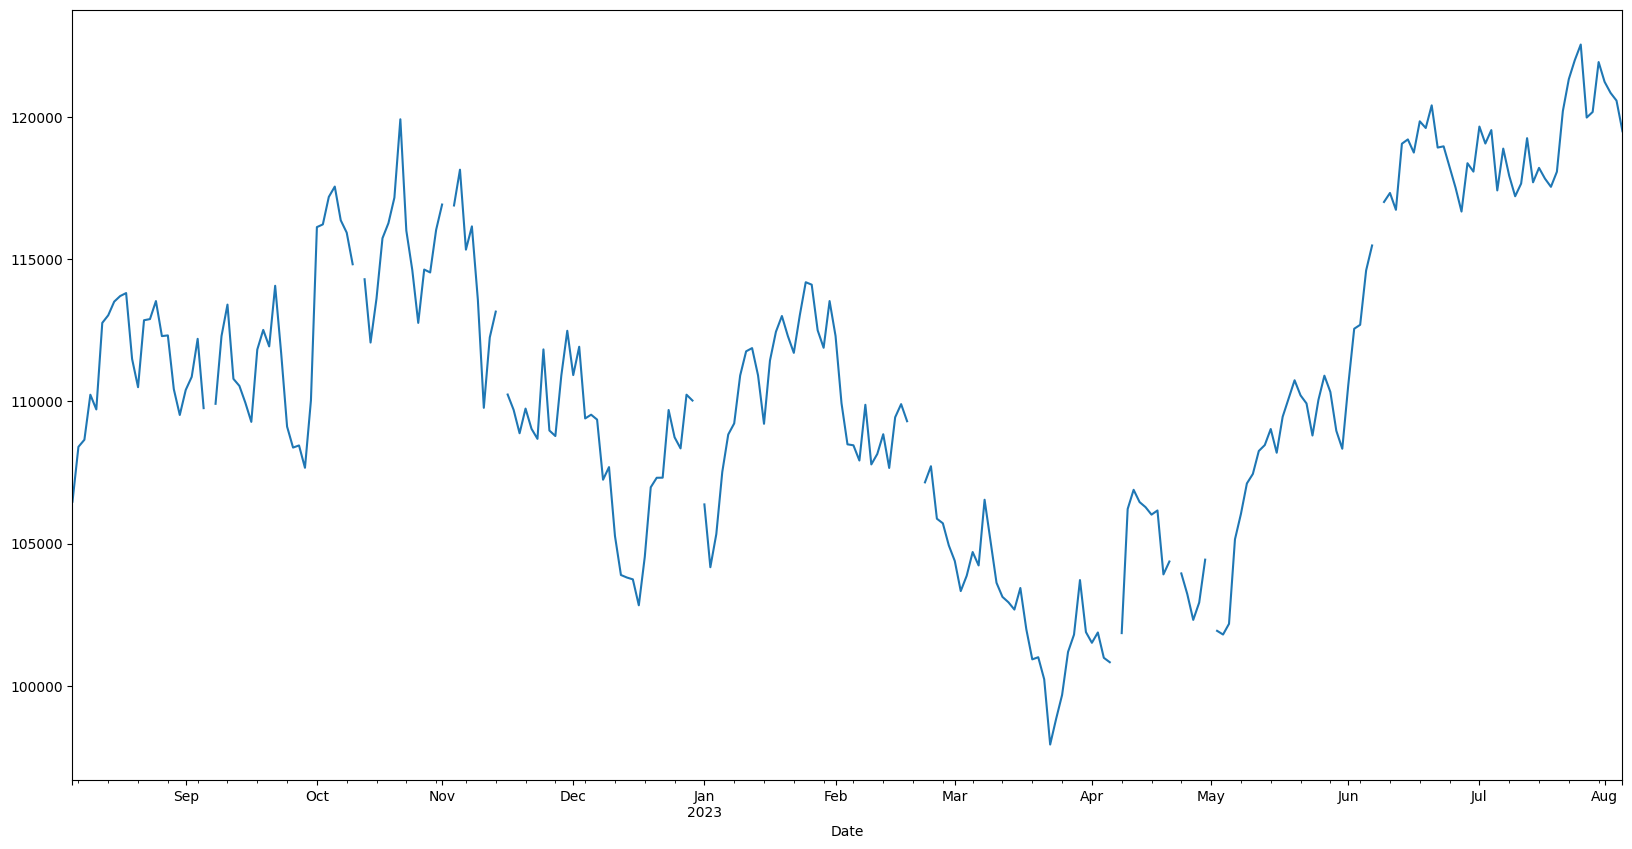

In [69]:
plt.figure(figsize=(20, 10))
df['Adj Close'].plot()

In [70]:
df['Retorno'] = df['Adj Close'].pct_change()

In [71]:
df = df.dropna()

In [72]:
mean_daily_return = df['Retorno'].mean()
std_daily_return = df['Retorno'].std()

##### Realizando as simulações de Monte Carlo

In [73]:
num_simulations = 100000
num_days = 100

In [74]:
simulation_results = []
last_price = df['Adj Close'].iloc[-1]
for _ in range(num_simulations):
    daily_returns = np.random.normal(mean_daily_return, std_daily_return, num_days)
    price_series = [last_price]
    for returns in daily_returns:
        price_series.append(price_series[-1] * (1 + returns))
    simulation_results.append(price_series)

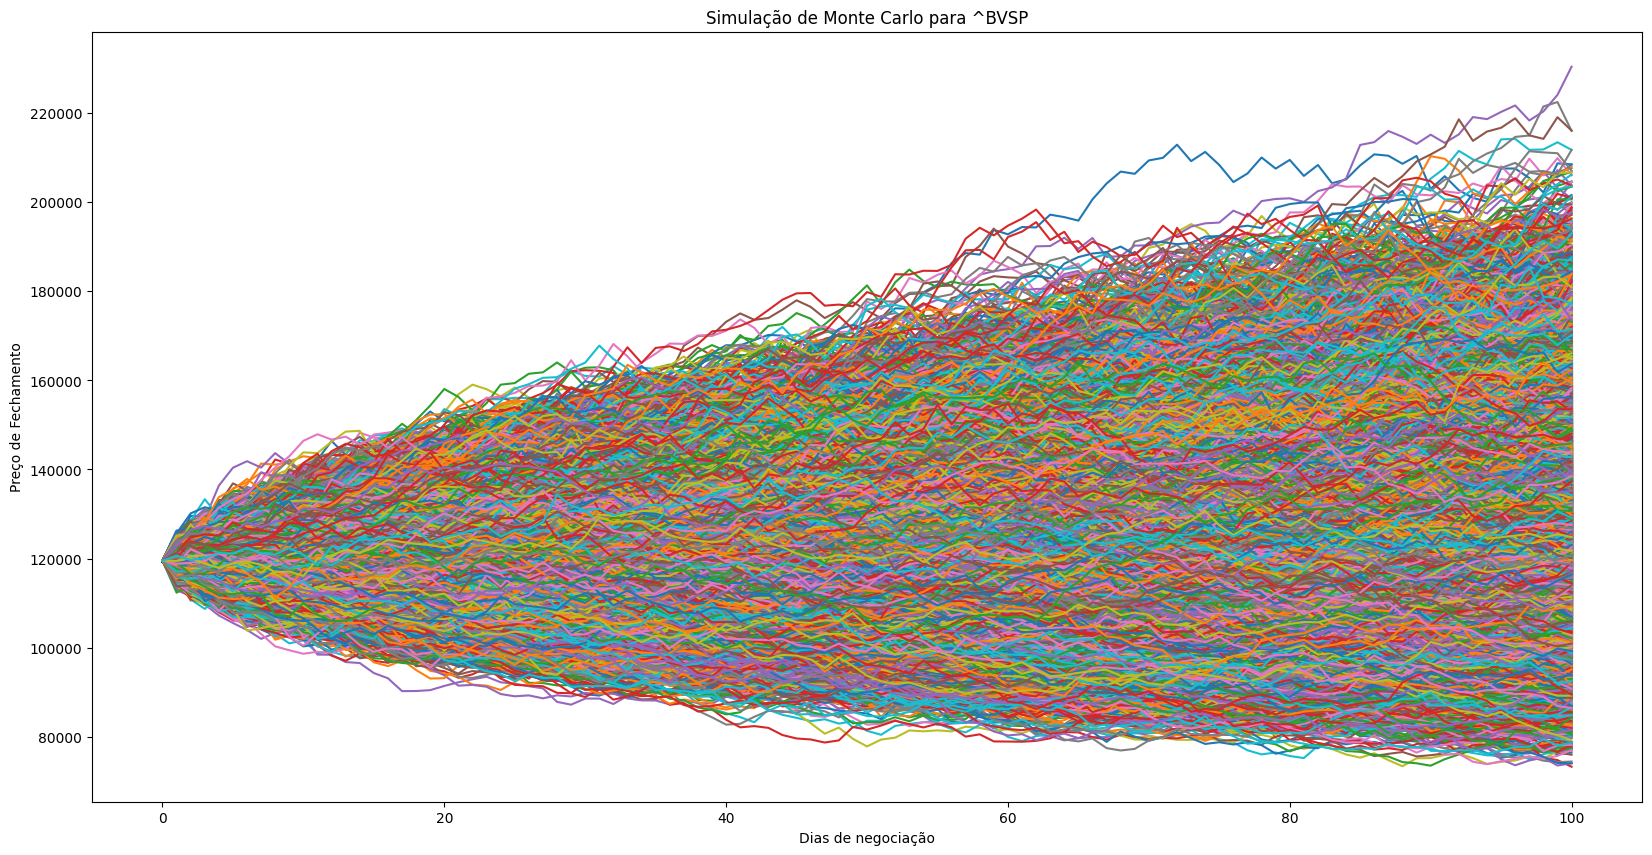

In [75]:
plt.figure(figsize=(20, 10))
for sim in simulation_results:
    plt.plot(sim)
plt.title('Simulação de Monte Carlo para {}'.format(ticker))
plt.xlabel('Dias de negociação')
plt.ylabel('Preço de Fechamento')
plt.show()

In [76]:
resultados = pd.DataFrame(simulation_results)

media_resultados = resultados.mean()
mediana_resultados = resultados.median()

##### Plotando Gráfico das simulações de Monte Carlo

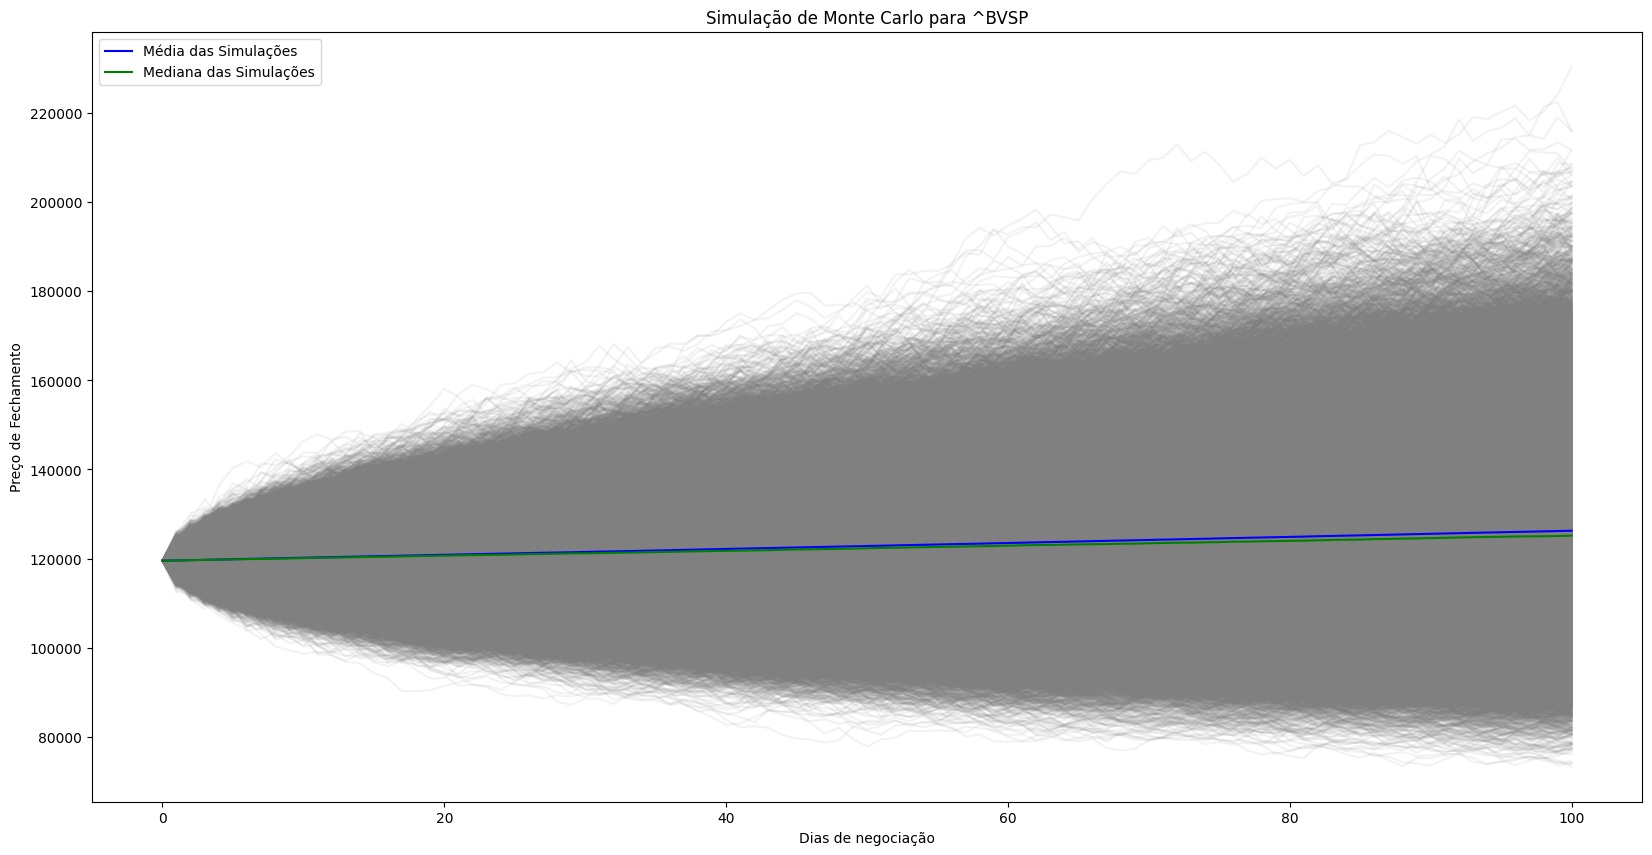

In [77]:
plt.figure(figsize=(20, 10))
for sim in simulation_results:
    plt.plot(sim, color='gray', alpha=0.1)
plt.plot(media_resultados, color='blue', label='Média das Simulações')
plt.plot(mediana_resultados, color='green', label='Mediana das Simulações')
plt.title('Simulação de Monte Carlo para {}'.format(ticker))
plt.xlabel('Dias de negociação')
plt.ylabel('Preço de Fechamento')
plt.legend()
plt.show()

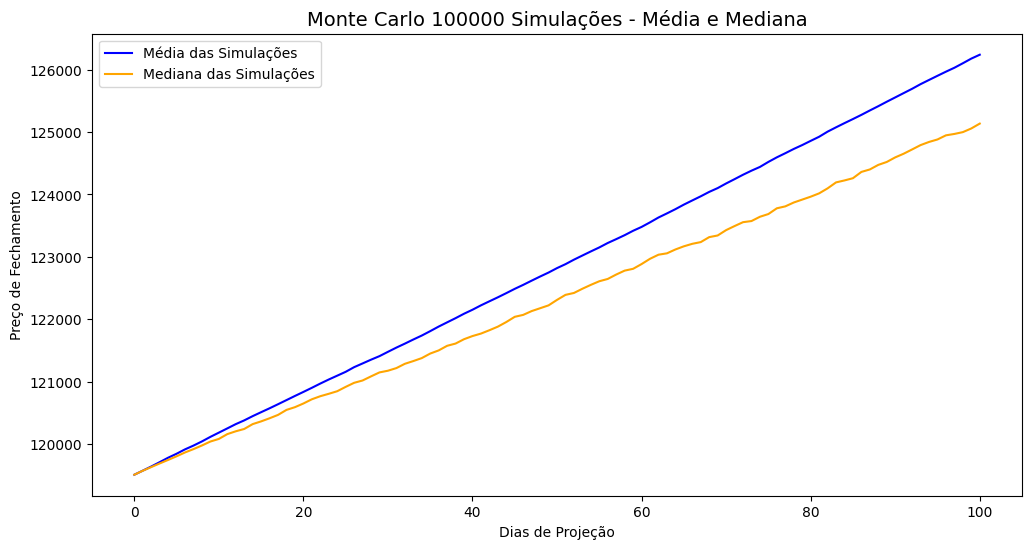

In [78]:
plt.figure(figsize=(12, 6))
plt.plot(media_resultados, label='Média das Simulações', color='blue')
plt.plot(mediana_resultados, label='Mediana das Simulações', color='orange')
plt.title(f'Monte Carlo {num_simulations} Simulações - Média e Mediana', size=14)
plt.xlabel('Dias de Projeção')
plt.ylabel('Preço de Fechamento')
plt.legend()
plt.show()

##### Clculando cenários de Lucro e Prejuízo

In [79]:
lucro = sum(1 for price_series in simulation_results if price_series[-1] > price_series[0])
prejuizo = sum(1 for price_series in simulation_results if price_series[-1] < price_series[0])

In [80]:
porcentagem_lucrativas = (lucro / num_simulations) * 100
porcentagem_prejuizo = (prejuizo / num_simulations) * 100

In [81]:
print('Cenários Lucrativos:', round(porcentagem_lucrativas,2), '%')
print('Cenários com Prejuízo:', round(porcentagem_prejuizo,2), '%')

Cenários Lucrativos: 63.45 %
Cenários com Prejuízo: 36.55 %
